The typical problem we have to solve:

Modeling data and determining how well some theoretical function describes experimental data.

Lets say we want to study the properties of a distribution e.g. physics process.
Typically we see the histogram and we want to see to which class of distribution belongs to.
we can obtain this by fitting our data and checking the residuals (goodness of fit)

In [50]:
#Necessary imports

# lib for numeric calculations
import numpy as np

# standard lib for python plotting
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# seaborn lib for more option in DS
import seaborn as sns

# so to obtain pseudo-random numbers
import random 
                                     
# fits a curve to data
from scipy.optimize import curve_fit                                     

In [74]:
# Lets say that a physics process gives us a gaussian distribution with a
# mean value somewhere between 3 nad 5
# and a sigma with a value around 1
# We do not know exactly their precise number and this is what we want to figure out with the fit.
mu =  random.randrange(3, 5, 1)
sigma = 0.1 * random.randrange(8, 12, 1)

In [93]:
# Now we know (or assume looking at the histogram) that our distribution is a gaussian
def gauss(x, *p):
    """ Gaussian model function
    """
    I, mu, sigma = p
    return I * np.exp( - (x - mu) ** 2 / (2. * sigma ** 2))



Fitted mean =  4.00332689357
Fitted standard deviation =  -1.10501201571


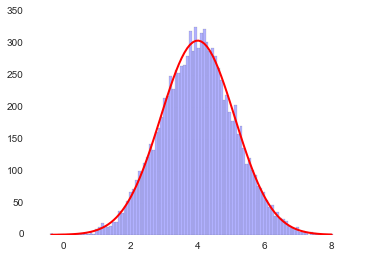

In [94]:
# Create the data
data = np.random.normal(mu, sigma, size=10000)

# Get histogram information
bin_values, bin_edges = np.histogram(data, density=False, bins=100)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2


# p0 is an initial guess for the fitting parameters (I, mu and sigma above)
params = [1., 4., 1.]

# Get the coefficients
coeff, var_matrix = curve_fit(gauss, bin_centres, bin_values, p0=params)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist_fit, label='Fitted data', color='red', linewidth=2)
_ = plt.hist(data, bins=100, color='blue', alpha=.3)

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted mean = ', coeff[1]
print 'Fitted standard deviation = ', coeff[2]
plt.show()

In [1]:
100./10000


0.01